In [1]:
# Importing all the required libraries

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn import tree
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
import os
from sklearn.pipeline import make_pipeline
os.getcwd()
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as s
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
# Loading the datasets
train = pd.read_csv('aug_train.csv')
test = pd.read_csv('aug_test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

   
   ### EDA -  Checking basic data charecteristics




In [3]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
train.shape

(19158, 14)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
train.nunique()

# City, Employee ID will NOT be used as Features since all these have high unique values

enrollee_id               19158
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [7]:
train.isnull().sum(axis = 0)

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [8]:
train.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### Data Visualization

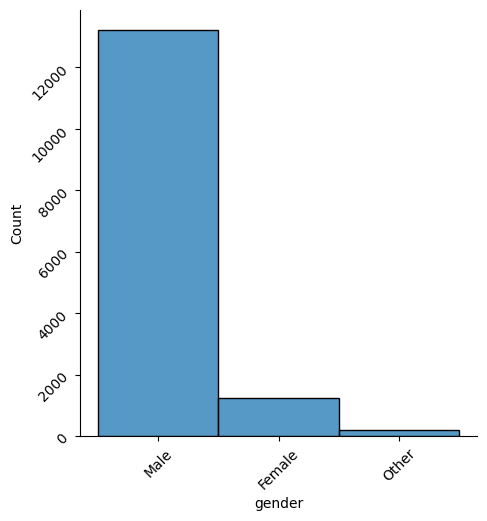

In [9]:
ax = sns.displot(train['gender']).tick_params(labelrotation=45);

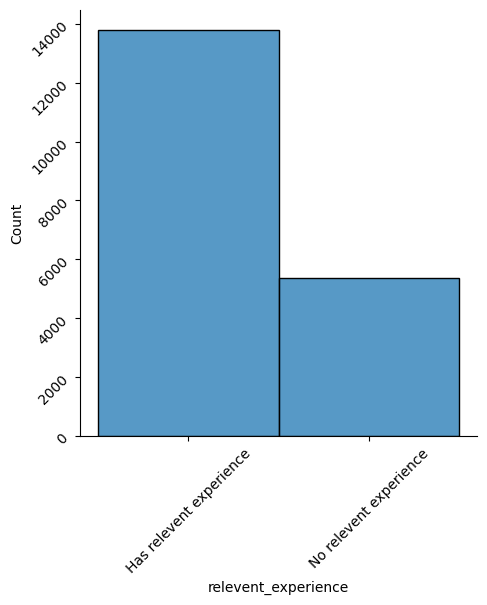

In [10]:
sns.displot(train['relevent_experience']).tick_params(labelrotation=45);

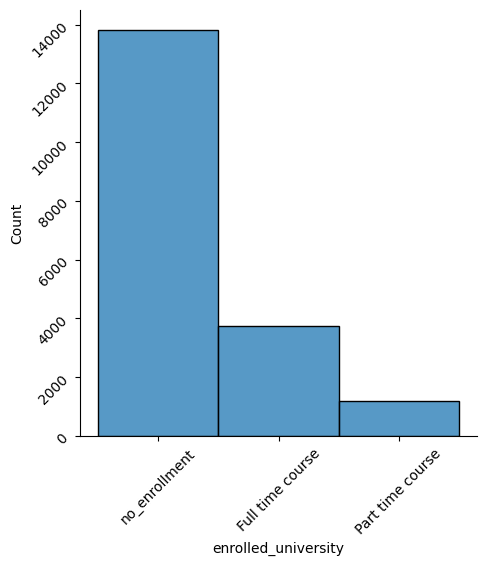

In [11]:
sns.displot(train['enrolled_university']).tick_params(labelrotation=45);

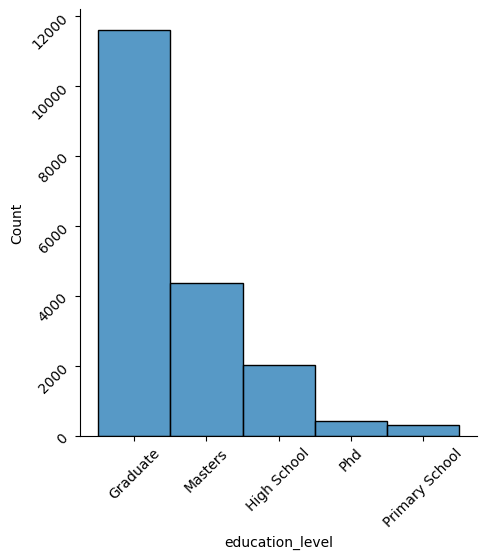

In [12]:
sns.displot(train['education_level']).tick_params(labelrotation=45);

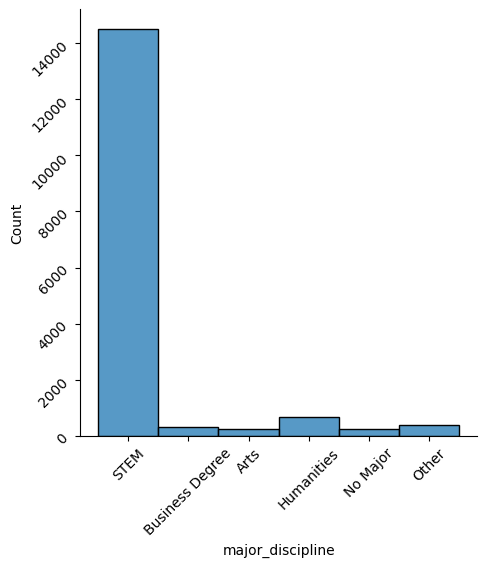

In [13]:
sns.displot(train['major_discipline']).tick_params(labelrotation=45);

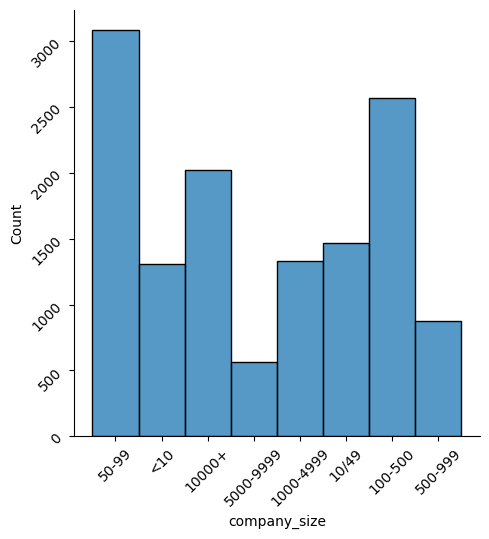

In [14]:
sns.displot(train['company_size']).tick_params(labelrotation=45);

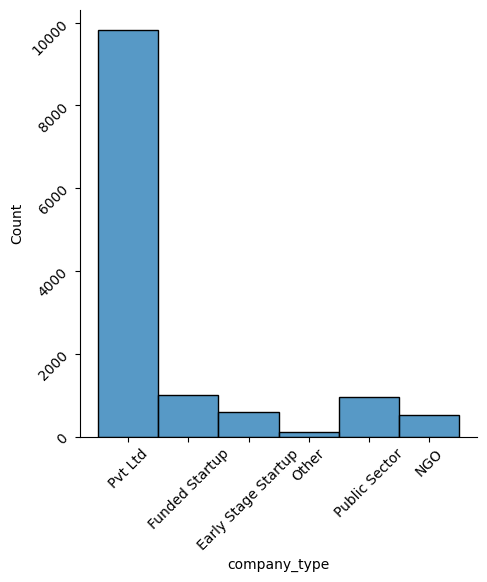

In [15]:
sns.displot(train['company_type']).tick_params(labelrotation=45);

In [16]:
# Checking frequency tables for other variables
train['experience'].value_counts()

>20    3286
5      1430
4      1403
3      1354
6      1216
2      1127
7      1028
10      985
9       980
8       802
15      686
11      664
14      586
1       549
<1      522
16      508
12      494
13      399
17      342
19      304
18      280
20      148
Name: experience, dtype: int64

In [17]:
train['last_new_job'].value_counts()

1        8040
>4       3290
2        2900
never    2452
4        1029
3        1024
Name: last_new_job, dtype: int64

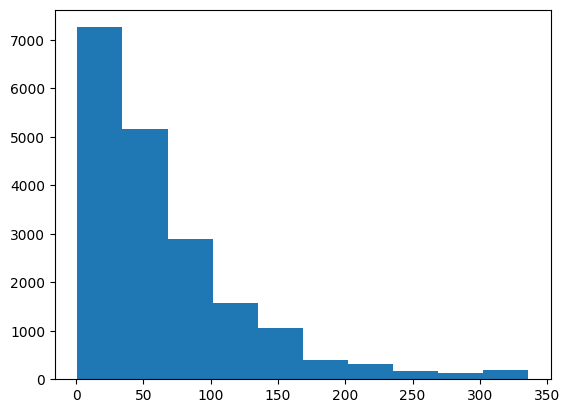

In [18]:
# Plotting histogram for numeric variable
plt.hist(train['training_hours']);

In [19]:
# Checking dependent variable split in data
train['target'].value_counts()

0.0    14381
1.0     4777
Name: target, dtype: int64

In [20]:
train['city'].value_counts() 

# City will be removed from this dataset as a feature as number of unique values are very high and 
# hence we will not consider it as a categorical variable


city_103    4355
city_21     2702
city_16     1533
city_114    1336
city_160     845
city_136     586
city_67      431
city_75      305
city_102     304
city_104     301
city_73      280
city_100     275
city_71      266
city_11      247
city_90      197
city_61      197
city_28      192
city_23      182
city_65      175
city_36      160
city_173     151
city_83      143
city_50      140
city_116     128
city_46      128
city_162     128
city_138     120
city_19      119
city_64      114
city_45      113
city_97      104
city_74      104
city_57      103
city_149     102
city_159      94
city_99       94
city_128      92
city_41       89
city_10       86
city_165      82
city_98       79
city_105      79
city_123      79
city_101      75
city_40       68
city_89       67
city_150      65
city_145      63
city_24       62
city_115      54
city_142      53
city_152      51
city_76       50
city_158      49
city_13       48
city_27       47
city_91       45
city_70       44
city_134      

In [21]:
# Also removing 'enrollee_id' from data since it is not required in model
train.drop(['enrollee_id','city'],axis=1,inplace=True)

### Separating independent and dependent variables

In [22]:
X = train.drop(columns=['target'])

y = train['target']

In [23]:
X.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours'],
      dtype='object')

In [24]:
y.head()

0    1.0
1    0.0
2    0.0
3    1.0
4    0.0
Name: target, dtype: float64

In [25]:
# Encoding categorical variables
X_cats = (OneHotEncoder(sparse=False,handle_unknown='ignore')
                   .fit_transform(X[['gender','relevent_experience',
                           'enrolled_university','education_level',
                           'major_discipline','company_type',
                           'last_new_job','experience','company_size']]))
X_cats = pd.DataFrame(X_cats)

In [26]:
# Merging encoded categorical variables with numeric variables
X_numerical = X.drop(columns=['gender','relevent_experience',
                                  'enrolled_university','education_level',
                                 'major_discipline','company_type',
                                  'last_new_job','experience','company_size'])
col_names = X_numerical.columns
X_numerical = pd.DataFrame(X_numerical, columns=col_names)
X = X_numerical.join(X_cats)

In [27]:
# Since the Target has "0" far more than "1" we will just fill NA values with 0 for this problem
X.fillna(0, inplace=True)

<Axes: >

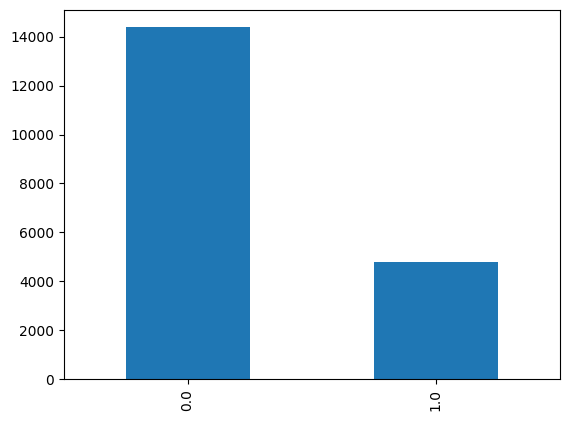

In [28]:
y.value_counts().plot(kind='bar')


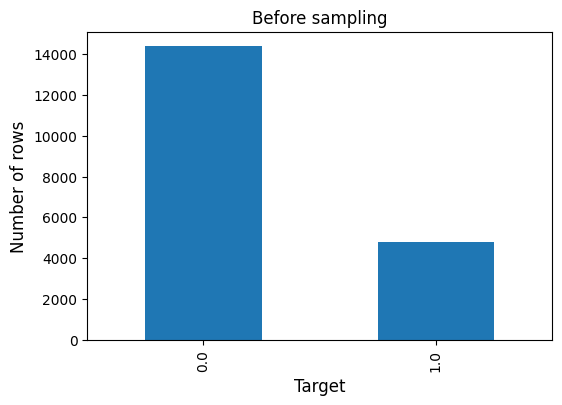

In [29]:
# Class imbalance is clearly visible
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar')
plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('Before sampling')
plt.show()

In [30]:
# Using SMOTE for handling class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X.columns = X.columns.astype('str')

X_smote, y_smote = smote.fit_resample(X,y)


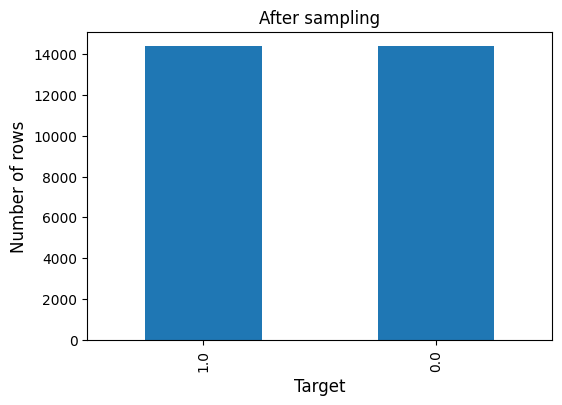

In [31]:
plt.figure(figsize=(6, 4))
y_smote.value_counts().plot(kind='bar')

plt.ylabel('Number of rows', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('After sampling')
plt.show()

In [32]:
# Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_smote,
                                                    y_smote,
                                                    test_size=0.2,
                                                    random_state=42)

In [33]:
# Creating a function to test and compare various algorithms
def model_fit(x_train, y_train, test_data):
    
    #LogisticRegression
    alg = LogisticRegression(max_iter=1000)
    alg.fit(x_train, y_train)
    y_pred = alg.predict(test_data)  
    print('Logistic Regression Model 1')
    print('AUC On Test Set - {}'.format(roc_auc_score(y_pred, y_test)))
    conf_mat = confusion_matrix(y_pred, y_test)
    print('Confusion Matrix :\n',conf_mat)
    sensitivity1 = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    print('Sensitivity : ', sensitivity1 )
    specificity1 = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    print('Specificity : ', specificity1)
    f1_score2 = f1_score(y_test,y_pred)
    print('f1_score : ', f1_score2)
    
    #SVM
    alg = SVC()
    alg.fit(x_train, y_train)
    y_pred = alg.predict(test_data)  
    print('SVM Model 2')
    print('AUC On Test Set - {}'.format(roc_auc_score(y_pred, y_test)))
    conf_mat = confusion_matrix(y_pred, y_test)
    print('Confusion Matrix :\n',conf_mat)
    sensitivity1 = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    print('Sensitivity : ', sensitivity1 )
    specificity1 = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    print('Specificity : ', specificity1)
    f1_score2 = f1_score(y_test,y_pred)
    print('f1_score : ', f1_score2)
        
    #RandomForest
    alg = RandomForestClassifier()
    alg.fit(x_train, y_train)
    y_pred = alg.predict(test_data)  
    print('Random Forest Model 3')
    print('AUC On Test Set - {}'.format(roc_auc_score(y_pred, y_test)))
    conf_mat = confusion_matrix(y_pred, y_test)
    print('Confusion Matrix :\n',conf_mat)
    sensitivity1 = conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1])
    print('Sensitivity : ', sensitivity1 )
    specificity1 = conf_mat[1,1]/(conf_mat[1,0]+conf_mat[1,1])
    print('Specificity : ', specificity1)
    f1_score2 = f1_score(y_test,y_pred)
    print('f1_score : ', f1_score2)
    

In [34]:
model_fit(X_train, y_train,X_test)

Logistic Regression Model 1
AUC On Test Set - 0.756398921444688
Confusion Matrix :
 [[2094  623]
 [ 783 2253]]
Sensitivity :  0.770702981229297
Specificity :  0.7420948616600791
f1_score :  0.7621786197564276
SVM Model 2
AUC On Test Set - 0.6508301716222823
Confusion Matrix :
 [[2237 1435]
 [ 640 1441]]
Sensitivity :  0.6092047930283224
Specificity :  0.6924555502162422
f1_score :  0.5814000403469841
Random Forest Model 3
AUC On Test Set - 0.8542190836589724
Confusion Matrix :
 [[2514  479]
 [ 363 2397]]
Sensitivity :  0.8399599064483796
Specificity :  0.8684782608695653
f1_score :  0.8506032647267566


#### From the above output, we can conclude that RandomForest is the best algorithm to go forward

In [35]:
# Tuning Hyperparameters
from sklearn.model_selection import RandomizedSearchCV

forest  = RandomForestClassifier(random_state = 42)

params = {
        'n_estimators' : [100, 300, 500, 800, 1200],
        'max_depth' : [5, 8, 15, 25, 30],
        'min_samples_split' : [2, 5, 10, 15, 100],
        'min_samples_leaf' : [1, 2, 5, 10] 
        }

gridF = RandomizedSearchCV(forest, params, cv = 5, verbose = 1)

In [36]:
clf_grid = gridF.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [37]:
clf_grid.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_depth': 30}

In [38]:
# Running model on entire data 
model = RandomForestClassifier(n_estimators=800,
                               min_samples_split=10,
                               min_samples_leaf=2, 
                               max_depth=30)
model.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=10,
                       n_estimators=800)

In [39]:
# Data managament on new test data same as training data
test.drop(['enrollee_id','city'],axis=1,inplace=True)

X_cats2 = (OneHotEncoder(sparse=False,handle_unknown='ignore')
                   .fit_transform(test[['gender','relevent_experience',
                           'enrolled_university','education_level',
                           'major_discipline','company_type',
                           'last_new_job','experience','company_size']]))
X_cats2 = pd.DataFrame(X_cats2)

X_numerical2 = test.drop(columns=['gender','relevent_experience',
                                  'enrolled_university','education_level',
                                 'major_discipline','company_type',
                                  'last_new_job','experience','company_size'])
col_names = X_numerical2.columns
X_numerical2 = pd.DataFrame(X_numerical2, columns=col_names)
X_test2 = X_numerical2.join(X_cats2)

X_test2.fillna(0, inplace=True)
X_test2.columns = X_test2.columns.astype('str')

In [40]:
# Prediction for new test data
sample_submission.target = model.predict(X_test2)
sample_submission.head()

,enrollee_id,target
0,32403,0.0
1,9858,0.0
2,31806,0.0
3,27385,0.0
4,27724,0.0


In [ ]:
sample_submission.to_csv('result.csv',index=False)

In [ ]:
import pickle

# Save the model to a file
with open("model_hr.pkl", "wb") as f:
    pickle.dump(model, f)